In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
img = cv2.imread('./test_images/2.png')

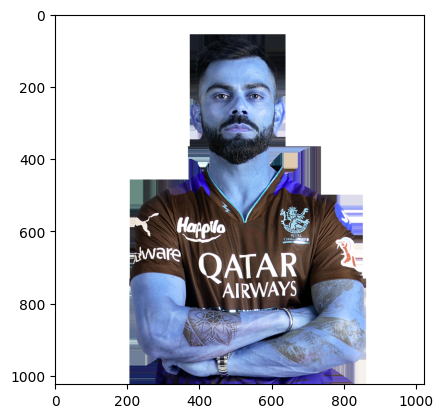

In [13]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

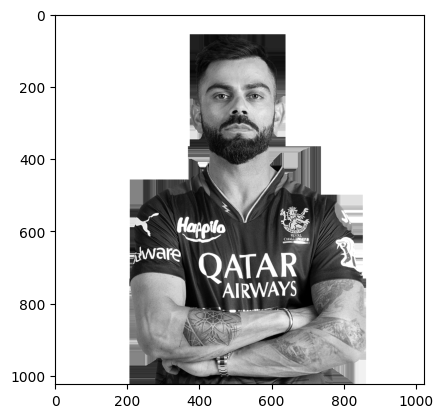

In [28]:
plt.imshow(gray, cmap='gray')

In [38]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[377, 116, 264, 264]])

In [36]:
(x,y,w,h) = faces[0]
x,y,w,h

(377, 116, 264, 264)

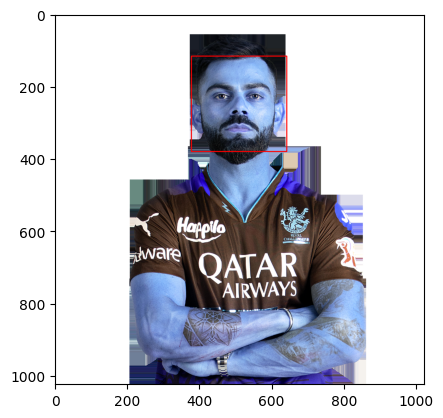

In [37]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

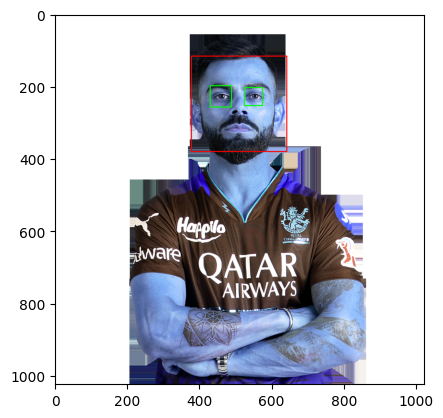

In [99]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

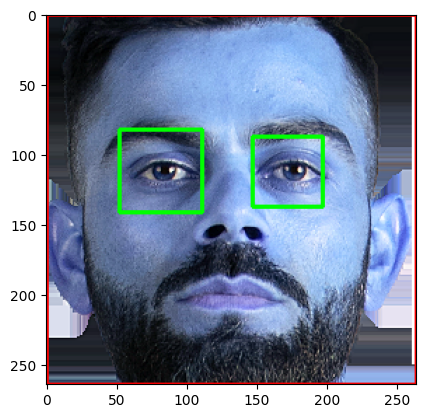

In [102]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [44]:
cropped_img = np.array(roi_color)
cropped_img.shape

(264, 264, 3)

In [85]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

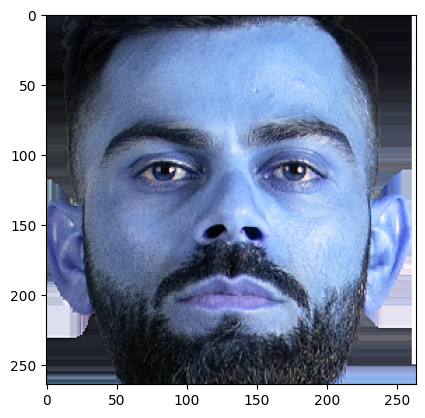

In [56]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/2.png')
plt.imshow(cropped_image)

In [88]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [89]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [90]:
img_dirs

['./dataset/cropped',
 './dataset/jasprit bumrah',
 './dataset/mahendra singh dhoni',
 './dataset/rohit sharma',
 './dataset/sachin tendulkar',
 './dataset/virat kohli']

In [115]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [116]:
cropped_image_dirs = []
sports_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    sports_name = img_dir.split('/')[-1]
    
    sports_file_names_dict[sports_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + sports_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating start",cropped_folder)
            
            cropped_file_name = sports_name + str(count) +".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            sports_file_names_dict[sports_name].append(cropped_file_path)
            count += 1

Generating start ./dataset/cropped/jasprit bumrah
Generating start ./dataset/cropped/mahendra singh dhoni
Generating start ./dataset/cropped/rohit sharma
Generating start ./dataset/cropped/sachin tendulkar
Generating start ./dataset/cropped/virat kohli


In [114]:
cropped_image_dirs

[]

In [117]:
sports_file_names_dict = {}
for img_dir in cropped_image_dirs:
    sports_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    sports_file_names_dict[sports_name] = file_list
sports_file_names_dict

{'jasprit bumrah': ['./dataset/cropped/jasprit bumrah\\jasprit bumrah1.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah10.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah12.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah13.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah14.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah15.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah16.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah17.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah18.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah19.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah2.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah20.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah21.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah22.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah24.png',
  './dataset/cropped/jasprit bumrah\\jasprit bumrah25.png',
  './dataset/cropped/jas

In [95]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

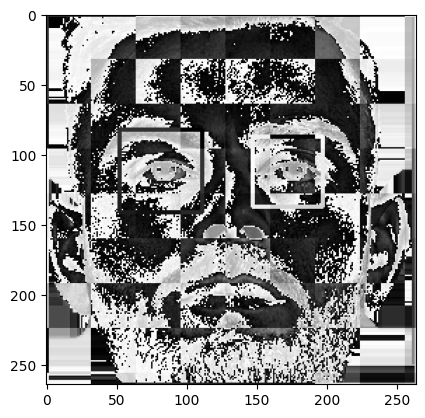

In [103]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [105]:
sports_file_names_dict

{'cropped': [],
 'jasprit bumrah': ['./dataset/cropped/jasprit bumrah/jasprit bumrah1.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah2.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah3.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah4.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah5.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah6.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah7.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah8.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah9.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah10.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah11.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah12.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah13.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah14.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah15.png',
  './dataset/cropped/jasprit bumrah/jasprit bumrah16.png',
  './dataset/cropped/jasprit bu

In [118]:
class_dict = {}
count = 0
for sports_name in sports_file_names_dict.keys():
    class_dict[sports_name] = count
    count += 1
class_dict

{'jasprit bumrah': 0,
 'mahendra singh dhoni': 1,
 'rohit sharma': 2,
 'sachin tendulkar': 3,
 'virat kohli': 4}

In [126]:
X = []
y = []
for sports_name, training_files in sports_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[sports_name])   

In [127]:
len(X[0])

4096

In [129]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(255, 4096)

In [131]:
X[0]

array([247., 212., 177., ...,  43.,   3., 255.])

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf',C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.640625

In [138]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.40      0.46      0.43        13
           2       0.80      0.44      0.57         9
           3       0.79      0.58      0.67        19
           4       0.71      0.83      0.77        12

    accuracy                           0.64        64
   macro avg       0.67      0.65      0.64        64
weighted avg       0.67      0.64      0.64        64



In [160]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [167]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }  
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [168]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\VIDHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\VIDHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\VIDHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\VIDHAN\AppData\Local\Programs\Python\Python311\Li

,model,best_score,best_params
0,svm,0.748853,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.544265,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.790958,{'logisticregression__C': 1}


In [169]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [170]:
best_estimators['svm'].score(X_test,y_test)

0.75

In [171]:
best_estimators['random_forest'].score(X_test,y_test)

0.453125

In [172]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6875

In [180]:
best_clf = best_estimators['svm']

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  1],
       [ 0, 11,  1,  1,  0],
       [ 1,  2,  4,  0,  2],
       [ 2,  4,  0, 13,  0],
       [ 1,  1,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

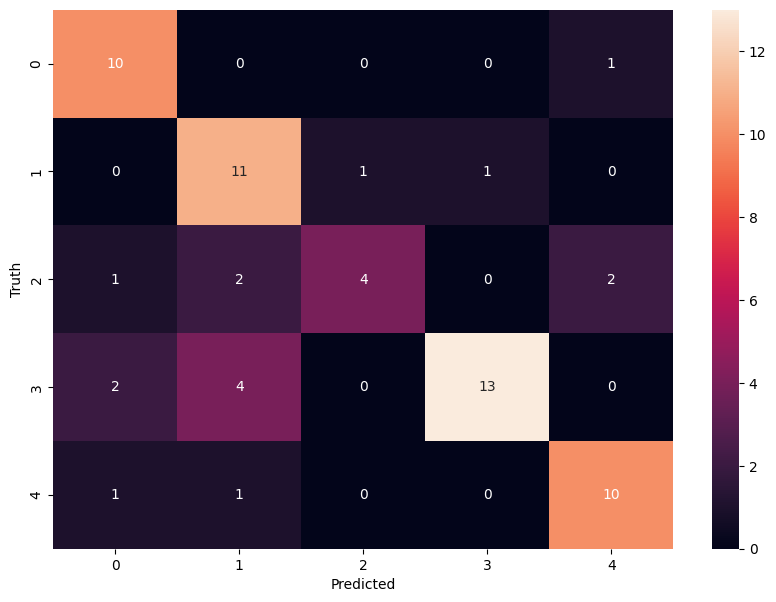

In [184]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [186]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [187]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))